<a href="https://colab.research.google.com/github/danielvijill/solar_energy/blob/main/geosite_dist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# prompt: mount the drive location of this file for importing csv files

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
folder_path = '/content/drive/MyDrive/Colab Notebooks'

In [4]:
csv_file_path = f'{folder_path}/sites.csv'
df = pd.read_csv(csv_file_path)
print(df.head())

  ID  Nombre                Cuadrante Departamento Coordenadas UTM Grid  \
0  1     NaN                ARAMECINA    F MORAZAN                44/11   
1  2     NaN                ARAMECINA    F MORAZAN                45/14   
2  3     NaN                   ARENAL         YORO              100/051   
3  4     NaN  AZACUALPA-RIO GUAYAMBRE      OLANCHO                99/00   
4  5     NaN  AZACUALPA-RIO GUAYAMBRE      OLANCHO                00/99   

   Latitud  Longitud  Temperatura Min  Temperatura Max  
0   13.670   -87.509              NaN              NaN  
1   13.707   -87.507              NaN              NaN  
2   15.422   -86.883             61.0             67.0  
3   14.546   -85.992              NaN              NaN  
4   14.505   -85.971              NaN              NaN  


In [ ]:
# prompt: build a pie chart with the data in df that shows the distribution of temperatures in the sites, use interbals of 10 (90-100 °C, 100-110°C), use the maximum of "Temperatura Max" and "Temperatura Min" and leave the sites with no temperature data as "N/A", then make another plot with only the available data, not the data non available

import matplotlib.pyplot as plt

# Define the temperature intervals
bins = range(90, int(df[['Temperatura Max', 'Temperatura Min']].max().max()) + 20, 10) # Ensure the last bin includes the max temperature
labels = [f'{i}°C - {i+9}°C' for i in bins[:-1]]

# Calculate the maximum temperature for each site, handling missing data
df['max_temp'] = df[['Temperatura Max', 'Temperatura Min']].max(axis=1)
df['temp_category'] = pd.cut(df['max_temp'], bins=bins, labels=labels, right=True)

# Count the occurrences in each category, including 'N/A'
temp_counts = df['temp_category'].value_counts(dropna=False)
temp_counts = temp_counts.rename({np.nan: 'N/A'})

# Plot the pie chart including 'N/A'
plt.figure(figsize=(10, 8))
plt.pie(temp_counts, labels=temp_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Maximum Temperatures Across Sites (Including N/A)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Filter out rows where max_temp is NaN for the second plot
df_available_temp = df.dropna(subset=['max_temp']).copy()

# Recalculate temperature categories for available data
df_available_temp['temp_category_available'] = pd.cut(df_available_temp['max_temp'], bins=bins, labels=labels, right=True)

# Count the occurrences in each category for available data
temp_counts_available = df_available_temp['temp_category_available'].value_counts()

# Plot the pie chart for only available data
plt.figure(figsize=(10, 8))
plt.pie(temp_counts_available, labels=temp_counts_available.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Maximum Temperatures Across Sites (Available Data Only)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

IndexError: index 1 is out of bounds for axis 0 with size 1

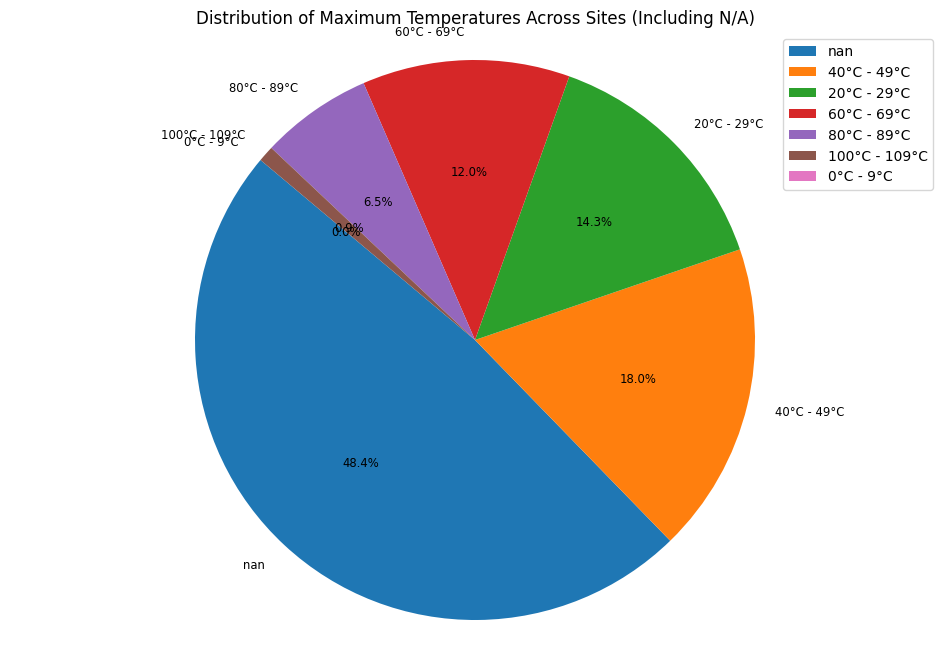

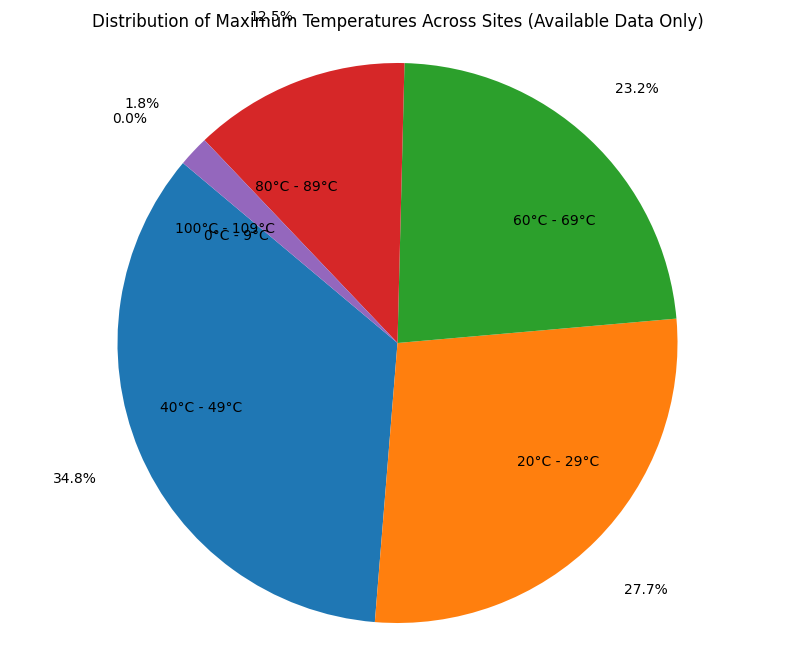

In [26]:
# prompt: build a pie chart with the data in df that shows the distribution of temperatures in the sites, use interbals of 10 (90-100 °C, 100-110°C), use the maximum of "Temperatura Max" and "Temperatura Min" and leave the sites with no temperature data as "N/A", then make another plot with only the available data, not the data non available

import matplotlib.pyplot as plt

# Define the temperature intervals
temp_max = df[['Temperatura Max', 'Temperatura Min']].max().max()
bins = list(range(0, int(temp_max) + 20, 20))  # Intervals of 10°C
labels = [f'{i}°C - {i+9}°C' for i in bins[:-1]]

# Calculate the maximum temperature for each site, handling missing data
df['max_temp'] = df[['Temperatura Max', 'Temperatura Min']].max(axis=1)
df['temp_category'] = pd.cut(df['max_temp'], bins=bins, labels=labels, right=True)

# Count the occurrences in each category, including 'N/A'
temp_counts = df['temp_category'].value_counts(dropna=False)
# temp_counts = temp_counts.rename({np.nan: 'N/A'})
temp_labels = temp_counts.index.to_list()
# Replace NaN with 'N/A' in labels
temp_labels = ['N/A' if pd.isna(lbl) else lbl for lbl in temp_labels]

# Plot the pie chart including 'N/A'
plt.figure(figsize=(12, 8))
plt.pie(temp_counts, labels=temp_counts.index, autopct='%1.1f%%', startangle=140, textprops={'size': 'smaller'})
plt.title('Distribution of Maximum Temperatures Across Sites (Including N/A)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()
plt.show()

# Filter out rows where max_temp is NaN for the second plot
df_available_temp = df.dropna(subset=['max_temp']).copy()

# Recalculate temperature categories for available data
df_available_temp['temp_category_available'] = pd.cut(df_available_temp['max_temp'], bins=bins, labels=labels, right=True)

# Count the occurrences in each category for available data
temp_counts_available = df_available_temp['temp_category_available'].value_counts()

# Plot the pie chart for only available data
plt.figure(figsize=(10, 8))
plt.pie(temp_counts_available, labels=temp_counts_available.index, autopct='%1.1f%%', startangle=140, pctdistance=1.25, labeldistance=.6)
plt.title('Distribution of Maximum Temperatures Across Sites (Available Data Only)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()